In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# This will automatically reload src/dtree.py every time you make changes and save the file
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('./train.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         16784 non-null  int64  
 1   title              16784 non-null  object 
 2   make               14624 non-null  object 
 3   model              16784 non-null  object 
 4   description        16439 non-null  object 
 5   manufactured       16590 non-null  float64
 6   original_reg_date  318 non-null    object 
 7   reg_date           16583 non-null  object 
 8   type_of_vehicle    16784 non-null  object 
 9   category           16784 non-null  object 
 10  transmission       16784 non-null  object 
 11  curb_weight        16205 non-null  float64
 12  power              14447 non-null  float64
 13  fuel_type          3490 non-null   object 
 14  engine_cap         16731 non-null  float64
 15  no_of_owners       16608 non-null  float64
 16  depreciation       163

Explore correlation between attributes (heatmap plot)

In [14]:
# drop irrelevant
df = df.drop(columns = ['listing_id', 'indicative_price'])

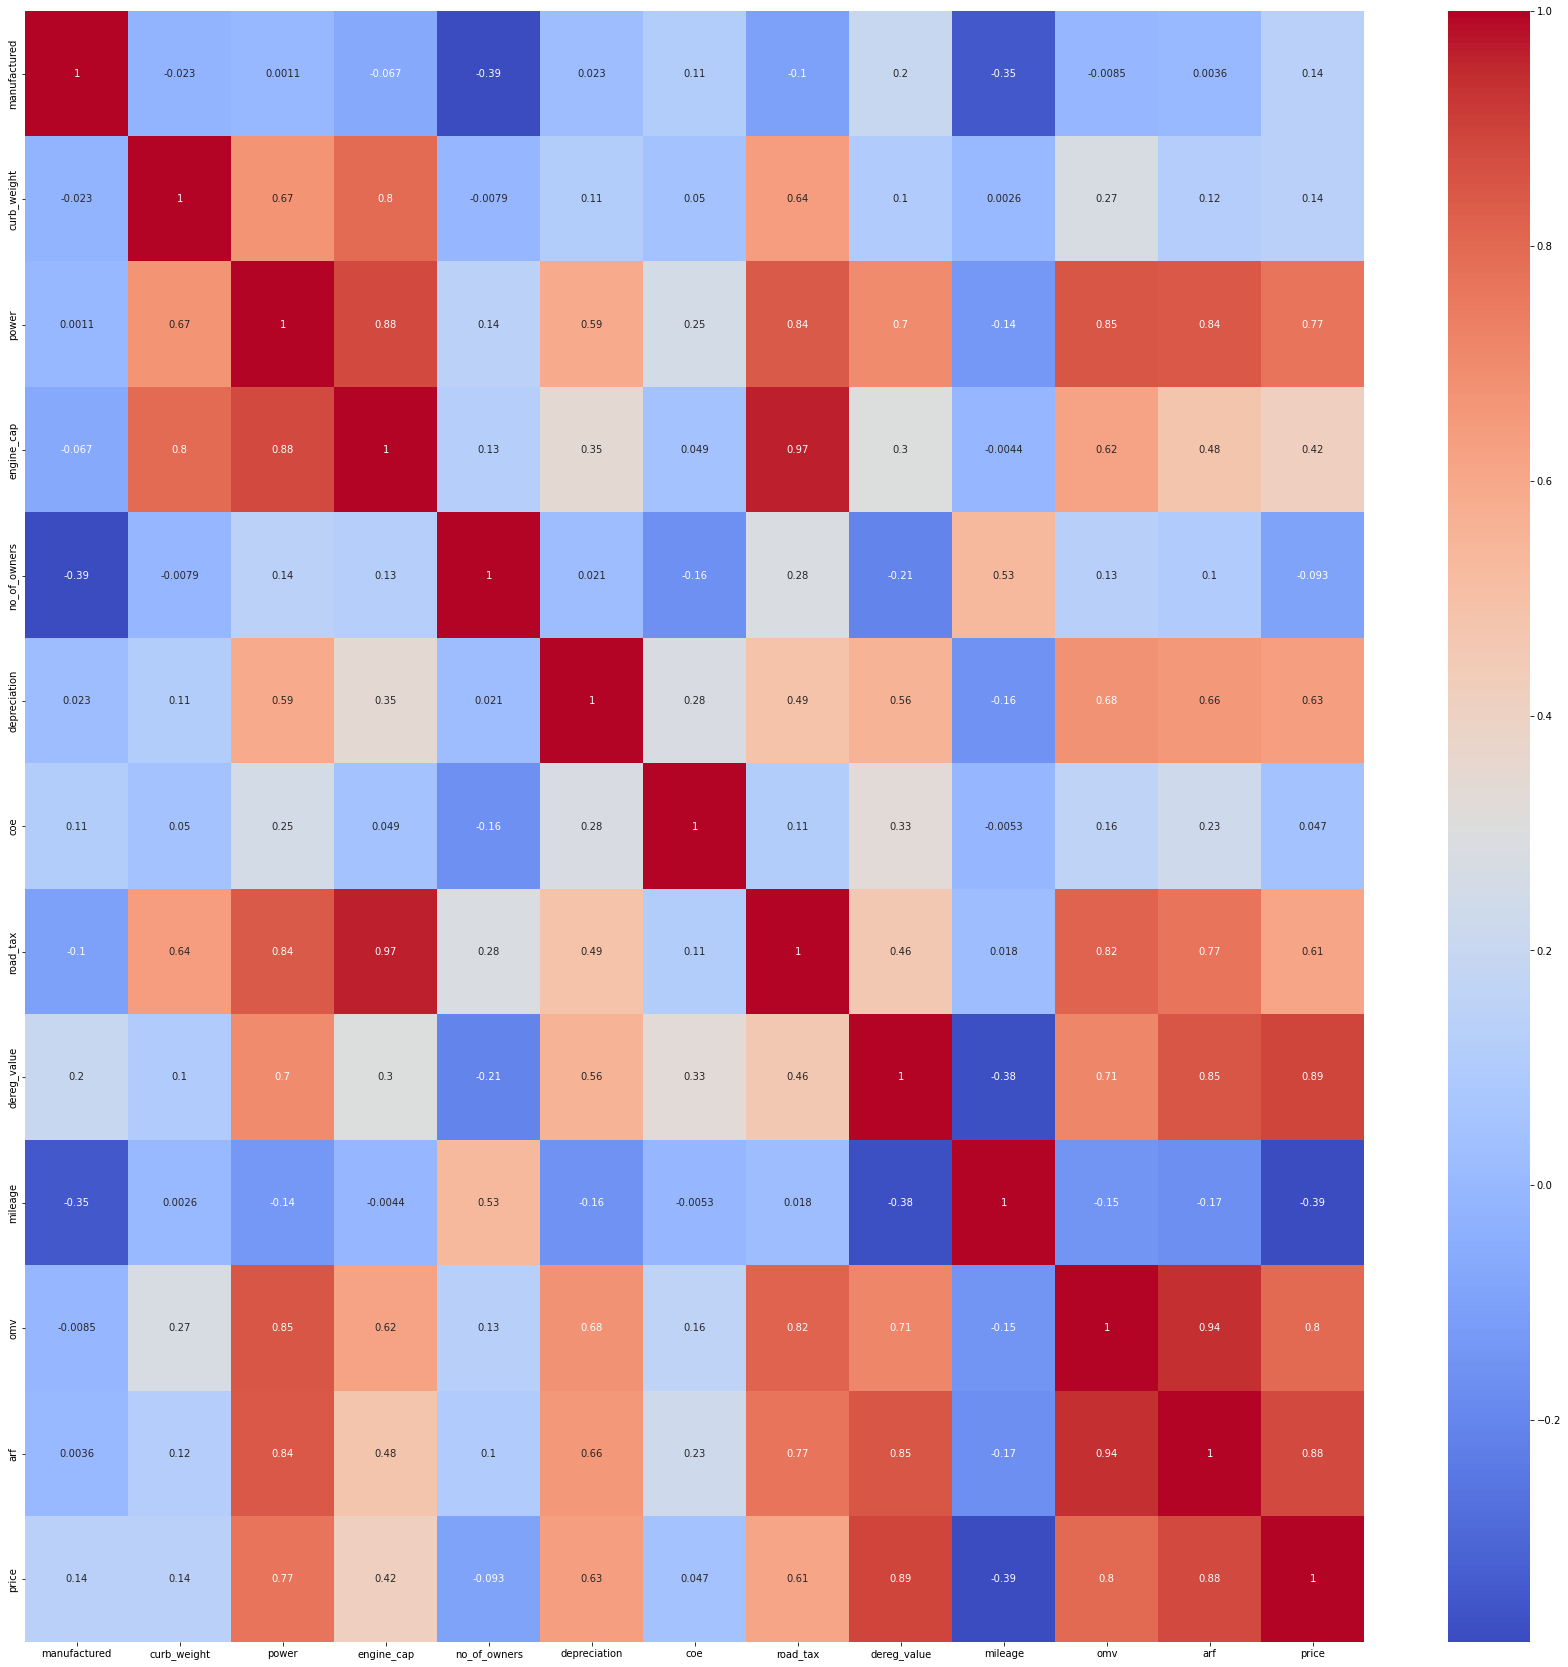

In [15]:
plt.figure(figsize=(30, 30))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

curbweight-engine_cap: 0.8
power-enginecap: 0.88
price-engine: 0.42
price-power: 0.77
price-mileage: 0.39
number-of-owners and price: 0.093
rd_tax-engine_cap: 0.97
keep: power, depreciation, rd tax, dereg_value, price, engine cap (for calculation of road tax)

cleaned data

In [34]:
df_ = pd.read_csv('./numerical_cleaned.csv')

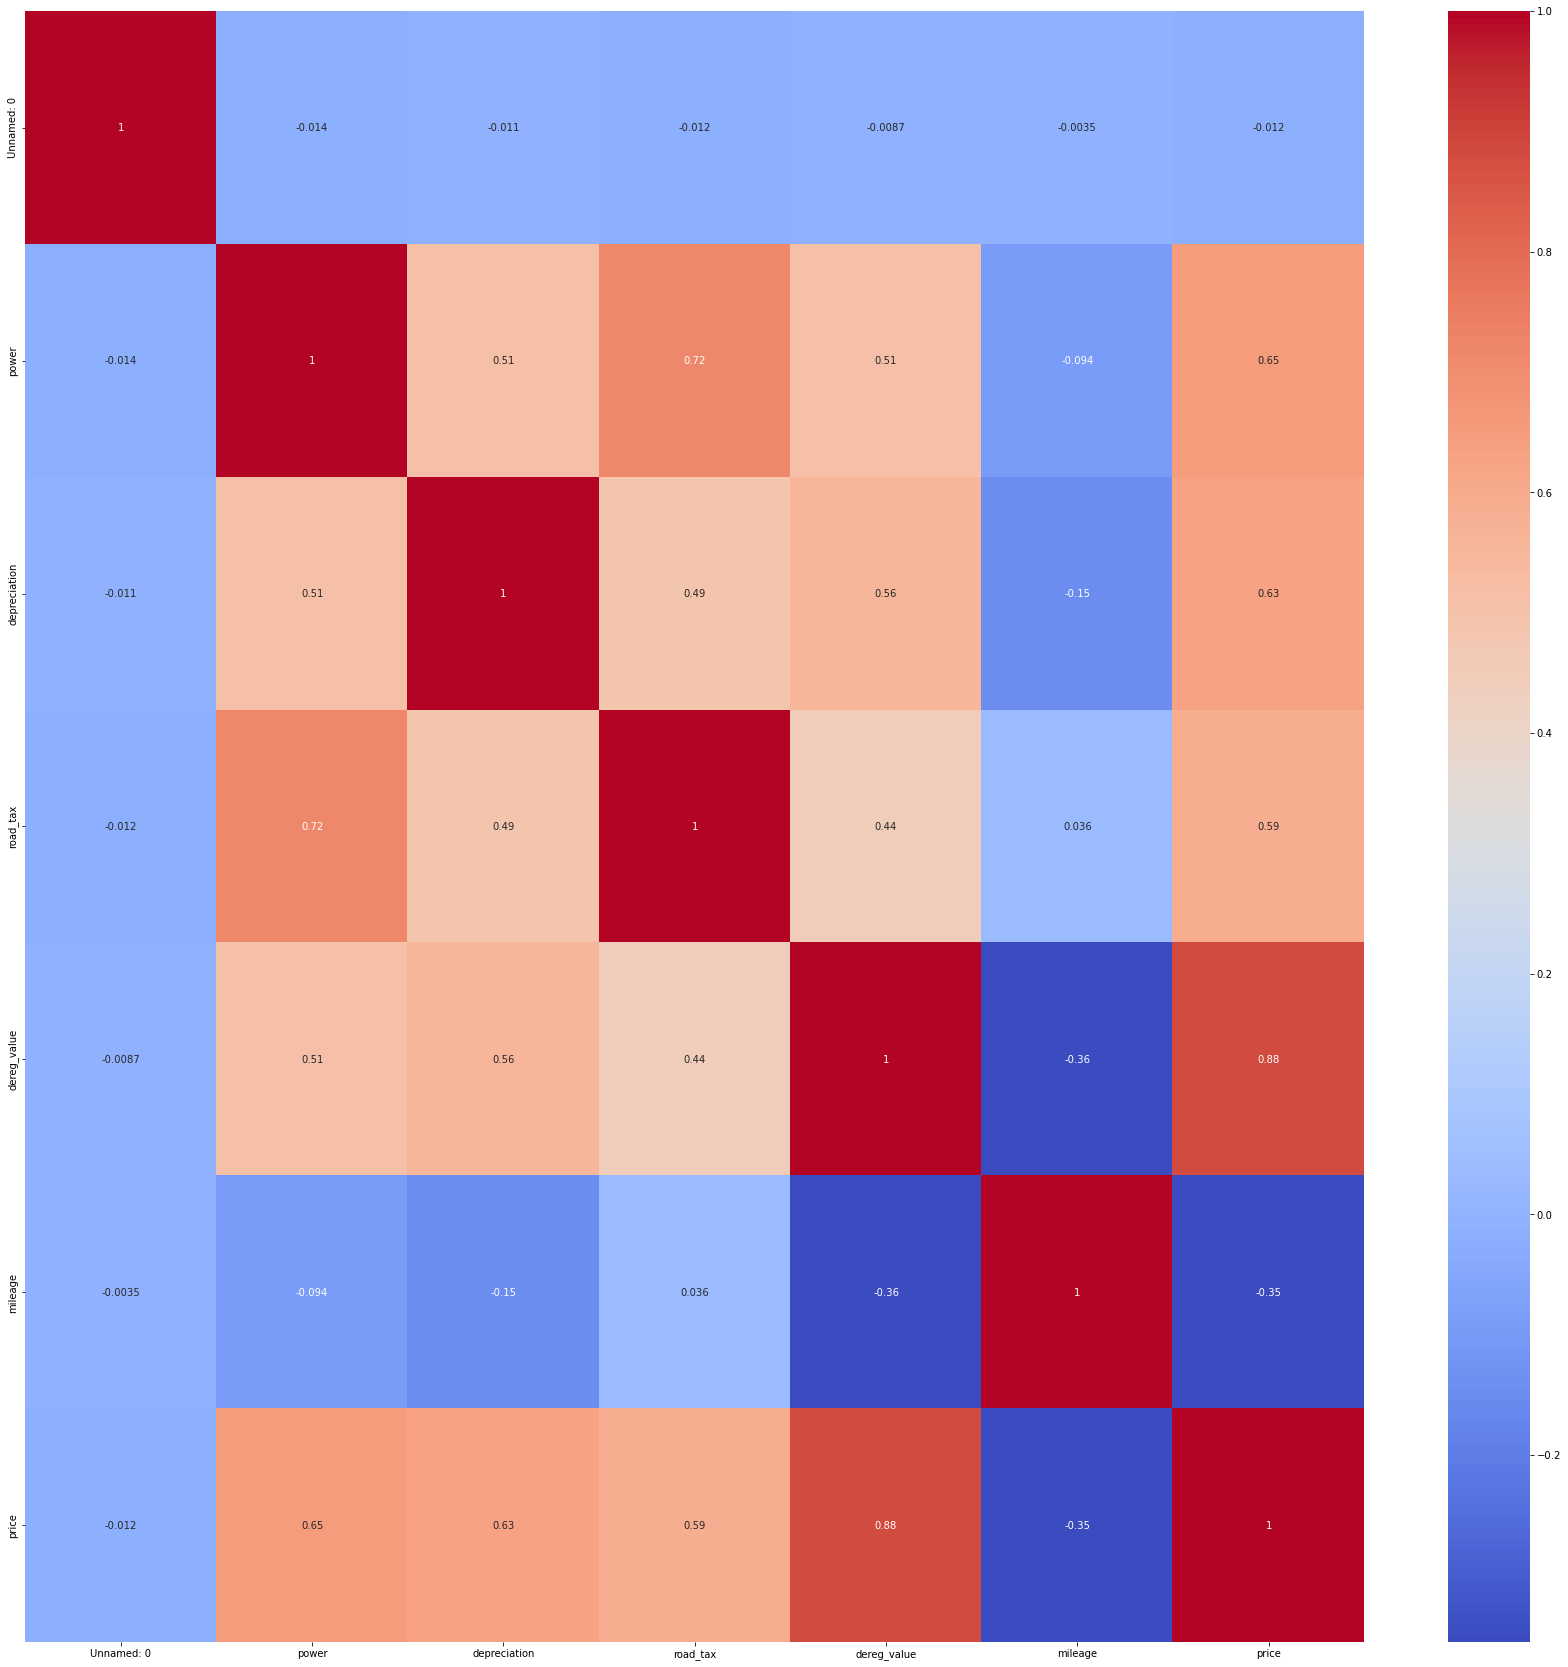

In [35]:
plt.figure(figsize=(30, 30))
correlations = df_.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

Explore distribution of certain attributes: 
keep power, depreciation, rd tax, dereg_value, mileage, price
keep category and 'type_of_vehicle' transmission 

In [37]:
df['type_of_vehicle'].unique()
# change to ordinal
# sports car / luxury sedan / suv > the rest

array(['luxury sedan', 'van', 'mid-sized sedan', 'sports car',
       'hatchback', 'suv', 'truck', 'mpv', 'stationwagon', 'bus/mini bus',
       'others'], dtype=object)

In [43]:
types = ['luxury sedan', 'van', 'mid-sized sedan', 'sports car',
       'hatchback', 'suv', 'truck', 'mpv', 'stationwagon', 'bus/mini bus',
       'others']
df = df.dropna(subset=['type_of_vehicle'])
ps = []
for t in types:
    pr = df[df.type_of_vehicle == t]['price']
    p = (np.average(pr), np.median(pr), t)
    ps.append(p)
print(sorted(ps))

[(54699.442379182154, 54950.0, 'van'), (54850.07593014427, 54800.0, 'mid-sized sedan'), (64044.74034620506, 58100.0, 'truck'), (69332.71028037384, 64700.0, 'bus/mini bus'), (69879.54048140044, 69150.0, 'hatchback'), (82526.19439868204, 76400.0, 'mpv'), (86886.64772727272, 79100.0, 'stationwagon'), (128621.42857142857, 97300.0, 'others'), (137557.4697613599, 104300.0, 'luxury sedan'), (137968.07345360826, 98850.0, 'suv'), (234678.6561264822, 150500.0, 'sports car')]


In [38]:
df['transmission'].unique() #auto = 1, manual = 0

array(['auto', 'manual'], dtype=object)